# `Customer Segmentation`

## Importing Libraries and Dataset

In [18]:
import pandas as pd
import numpy as np3
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\Final_Projects\customer-churn-analysis\customer_churn_dataset-training-master.csv")

In [4]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
data.columns=data.columns.str.lower()

In [7]:
data.head()

,customerid,age,gender,tenure,usage frequency,support calls,payment delay,subscription type,contract length,total spend,last interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [9]:
data.drop('customerid',axis=1,inplace=True)

In [11]:
data.head()

,age,gender,tenure,usage frequency,support calls,payment delay,subscription type,contract length,total spend,last interaction,churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [13]:
churned_data=data[data['churn']==1]

In [14]:
non_churned_data=data[data['churn']==0]

In [16]:
processor= ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[1,6,7]),
    ('scale',StandardScaler(),[0,2,3,4,5,8,9])
],remainder='passthrough')

In [17]:
churned_scaled = processor.fit_transform(churned_data)
non_churned_scaled= processor.fit_transform(non_churned_data)

In [23]:
churned_scaled[0]

array([ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
       -0.84058783,  0.49168948, -0.16848625, -0.04610996,  0.31003473,
        1.50361427,  0.16123254,  1.        ])

[1847185.6237330162, 1730587.9719618512, 1636483.0607618166, 1568675.8015408763, 1510629.2692300717, 1458399.753410594, 1411648.6125837257, 1376022.5061978241]


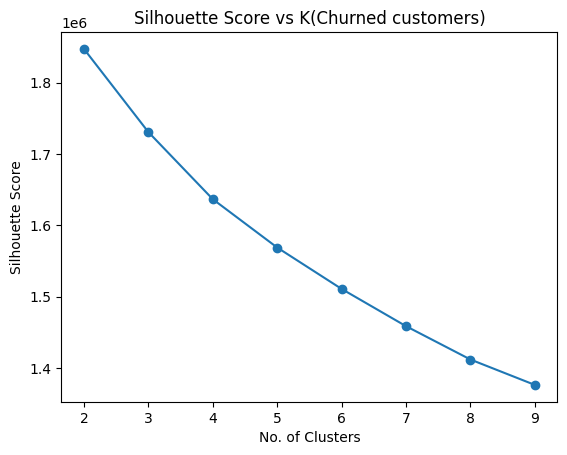

In [24]:
scores = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(churned_scaled)
    scores.append(model.inertia_)
print(scores)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs K(Churned customers)")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

[1335606.7887710012, 1236845.7593102313, 1177052.98187442, 1109768.6771209035, 1066947.8266326257, 1027966.263334469, 992847.8542093411, 966548.1100110768]


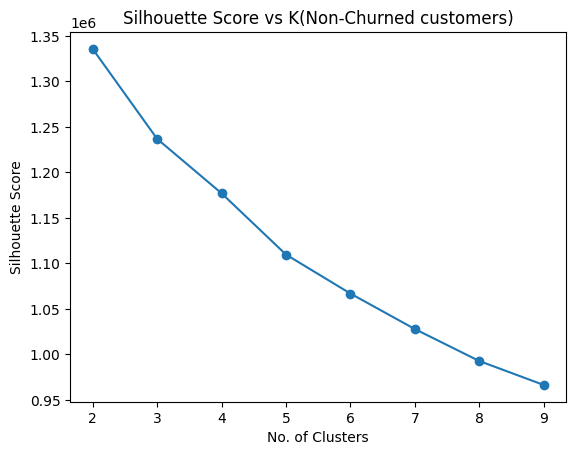

In [25]:
scores = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(non_churned_scaled)
    scores.append(model.inertia_)
print(scores)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs K(Non-Churned customers)")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")
plt.show()